In [1]:
import numpy as np
import pandas as pd
import main
fake_data_wc = pd.read_csv('fake_data/fake_wc_res.csv', delimiter=';')
fake_data_wc.head()

,ID,X,Y,WC
0,0,348202,6460000,1.700000e+38
1,1,348202,6460000,1.700000e+38
2,2,348202,6460000,1.700000e+38
3,3,348202,6460000,1.700000e+38
4,4,348202,6460000,1.700000e+38


In [2]:
# Конвертируем форматы
fake_data_wc['WC'] = fake_data_wc['WC'].astype('float64')
fake_data_wc['ID'] = fake_data_wc['ID'].astype('str')
fake_data_wc['WELL_NAME'] = 'fake_' + fake_data_wc['ID']
del fake_data_wc['ID']
fake_data_wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5399 entries, 0 to 5398
Data columns (total 4 columns):
X            5399 non-null int64
Y            5399 non-null int64
WC           5399 non-null float64
WELL_NAME    5399 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 168.8+ KB


In [3]:
# Удаляем значения зашедшие за край
fake_data_wc = fake_data_wc.drop(fake_data_wc[fake_data_wc['WC'] > 1].index)
fake_data_wc.head()

,X,Y,WC,WELL_NAME
24,348302,6460000,0.39,fake_24
25,348302,6460000,0.39,fake_25
26,348302,6460000,0.39,fake_26
27,348302,6460000,0.39,fake_27
28,348302,6460000,0.39,fake_28


In [4]:
#fake_las_out = pd.read_csv('fake_data/fake_las_out.csv', delimiter=';')
fake_las_out = pd.read_csv('fake_data/fake_las_aps2.csv', delimiter=';')
fake_las_out.head()

,WELL_NAME,DEPTH,APS
0,fake_0,2584.999314,0.108079
1,fake_0,2585.163988,0.108079
2,fake_0,2585.164152,0.108079
3,fake_0,2585.328638,0.120395
4,fake_0,2585.328803,0.121827


In [5]:
fake_bottom = pd.read_csv('fake_data/fake_bottom_res.csv', delimiter=';')
fake_bottom['ID'] = fake_bottom['ID'].astype('str')
fake_bottom['WELL_NAME'] = 'fake_' + fake_bottom['ID']
fake_bottom = fake_bottom.rename(columns={'DEPTH': 'DEPTH_BOTTOM'})
del fake_bottom['ID']
del fake_bottom['X']
del fake_bottom['Y']
fake_bottom.head()

,DEPTH_BOTTOM,WELL_NAME
0,2601.50,fake_0
1,2600.09,fake_1
2,2598.85,fake_2
3,2598.79,fake_3
4,2599.31,fake_4


In [6]:
fake_top = pd.read_csv('fake_data/fake_top_res.csv', delimiter=';')
fake_top['ID'] = fake_top['ID'].astype('str')
fake_top['WELL_NAME'] = 'fake_' + fake_top['ID']
fake_top = fake_top.rename(columns={'DEPTH': 'DEPTH_TOP'})
del fake_top['ID']
del fake_top['X']
del fake_top['Y']
fake_top.head()

,DEPTH_TOP,WELL_NAME
0,2585.02,fake_0
1,2582.98,fake_1
2,2581.22,fake_2
3,2580.52,fake_3
4,2580.87,fake_4


In [7]:
fake_data = pd.merge(fake_data_wc, fake_las_out, on='WELL_NAME')
fake_data = pd.merge(fake_data, fake_top, on='WELL_NAME') 
fake_data = pd.merge(fake_data, fake_bottom, on='WELL_NAME')
fake_data.head()

,X,Y,WC,WELL_NAME,DEPTH,APS,DEPTH_TOP,DEPTH_BOTTOM
0,348302,6460000,0.39,fake_24,2588.656453,0.079325,2588.27,2603.89
1,348302,6460000,0.39,fake_24,2588.811598,0.079325,2588.27,2603.89
2,348302,6460000,0.39,fake_24,2588.811753,0.156230,2588.27,2603.89
3,348302,6460000,0.39,fake_24,2588.966872,0.156230,2588.27,2603.89
4,348302,6460000,0.39,fake_24,2588.967028,0.107850,2588.27,2603.89


In [8]:
# нормализируем по aps
print(fake_data['APS'].min())
print(fake_data['APS'].max())

mask_sub_zero = fake_data.APS < 0
mask_above_one = fake_data.APS > 1
column_name = 'APS'
fake_data.loc[mask_sub_zero, column_name] = 0
fake_data.loc[mask_above_one, column_name] = 1

print(fake_data['APS'].min())
print(fake_data['APS'].max())

-0.505859077
1.1603434086
0.0
1.0


In [63]:
fake_data.head()

,X,Y,WC,WELL_NAME,DEPTH,APS,DEPTH_TOP,DEPTH_BOTTOM
0,348302,6460000,0.39,fake_24,2588.656453,0.079325,2588.27,2603.89
1,348302,6460000,0.39,fake_24,2588.811598,0.079325,2588.27,2603.89
2,348302,6460000,0.39,fake_24,2588.811753,0.156230,2588.27,2603.89
3,348302,6460000,0.39,fake_24,2588.966872,0.156230,2588.27,2603.89
4,348302,6460000,0.39,fake_24,2588.967028,0.107850,2588.27,2603.89


In [64]:
well_name_list = fake_data['WELL_NAME'].value_counts().index.tolist()

In [72]:
print(len(well_name_list))
well_name_list = pd.DataFrame(well_name_list)

5322


In [80]:
np.random.seed(10)

remove_n = 5170
drop_indices = np.random.choice(well_name_list.index, remove_n, replace=False)
selected_wells = well_name_list.drop(drop_indices)


In [81]:
print(len(selected_wells))
selected_wells.head()

152


,0
44,fake_4780
62,fake_74
89,fake_2511
93,fake_973
232,fake_1701


In [82]:
selected_wells = np.array(selected_wells[0])
selected_wells

array(['fake_4780', 'fake_74', 'fake_2511', 'fake_973', 'fake_1701',
       'fake_443', 'fake_43', 'fake_2905', 'fake_1624', 'fake_4920',
       'fake_4857', 'fake_2805', 'fake_2466', 'fake_3950', 'fake_3552',
       'fake_1898', 'fake_4965', 'fake_4156', 'fake_2723', 'fake_4836',
       'fake_1771', 'fake_781', 'fake_5021', 'fake_939', 'fake_4553',
       'fake_2560', 'fake_5151', 'fake_2372', 'fake_1854', 'fake_4481',
       'fake_5323', 'fake_4716', 'fake_3425', 'fake_3748', 'fake_652',
       'fake_2428', 'fake_2316', 'fake_2227', 'fake_2710', 'fake_4547',
       'fake_2450', 'fake_651', 'fake_278', 'fake_1440', 'fake_5047',
       'fake_1128', 'fake_634', 'fake_5137', 'fake_4253', 'fake_3861',
       'fake_1933', 'fake_5290', 'fake_1274', 'fake_5079', 'fake_4313',
       'fake_1813', 'fake_3402', 'fake_3662', 'fake_3340', 'fake_4914',
       'fake_5234', 'fake_2621', 'fake_4885', 'fake_4682', 'fake_63',
       'fake_584', 'fake_1968', 'fake_5138', 'fake_4120', 'fake_492',
       '

In [83]:
fake_data_cutted = fake_data[fake_data['WELL_NAME'] == 'fake_1']
for nn in selected_wells:
    print(nn)
    fake_data_well = fake_data[fake_data['WELL_NAME'] == nn]
#     print(fake_data_well.head())
    
    fake_data_cutted = fake_data_cutted.append(fake_data_well)

fake_data_cutted.shape

fake_4780
fake_74
fake_2511
fake_973
fake_1701
fake_443
fake_43
fake_2905
fake_1624
fake_4920
fake_4857
fake_2805
fake_2466
fake_3950
fake_3552
fake_1898
fake_4965
fake_4156
fake_2723
fake_4836
fake_1771
fake_781
fake_5021
fake_939
fake_4553
fake_2560
fake_5151
fake_2372
fake_1854
fake_4481
fake_5323
fake_4716
fake_3425
fake_3748
fake_652
fake_2428
fake_2316
fake_2227
fake_2710
fake_4547
fake_2450
fake_651
fake_278
fake_1440
fake_5047
fake_1128
fake_634
fake_5137
fake_4253
fake_3861
fake_1933
fake_5290
fake_1274
fake_5079
fake_4313
fake_1813
fake_3402
fake_3662
fake_3340
fake_4914
fake_5234
fake_2621
fake_4885
fake_4682
fake_63
fake_584
fake_1968
fake_5138
fake_4120
fake_492
fake_327
fake_2772
fake_2789
fake_4639
fake_1015
fake_3029
fake_5397
fake_5159
fake_4014
fake_1294
fake_382
fake_2547
fake_1495
fake_4616
fake_3604
fake_2236
fake_775
fake_4614
fake_5202
fake_1150
fake_5168
fake_547
fake_4019
fake_2944
fake_1400
fake_1785
fake_1068
fake_4568
fake_2108
fake_4707
fake_771
fake_4104
f

(30552, 8)

In [85]:
fake_data = fake_data_cutted

In [86]:
from scipy import interpolate
well_name_list = fake_data['WELL_NAME'].value_counts().index.tolist()
x_values = []
y_values = []
count_val = 100
well_count = 0
min_count_val_in_data = 10
for well_name in well_name_list:
    if well_count%500 == 0:
        print(well_count, ' of ', len(well_name_list))
    data_well =  fake_data[fake_data['WELL_NAME'] == well_name]
    bottom = data_well['DEPTH_BOTTOM'].tolist()[0]
    top = data_well['DEPTH_TOP'].tolist()[0]
    # print('top = ', top)
    # print('bottom =', bottom)    
    data_well_by_bound = data_well[(data_well['DEPTH'] >= top) & (data_well['DEPTH'] <= bottom)]
    x_arr = data_well_by_bound['DEPTH']
    y_arr = data_well_by_bound['APS']
    
    if (len(x_arr) < min_count_val_in_data):
            continue
    
    # print ('length of array depth', len(x_arr))
    f_spline = interpolate.interp1d(x_arr, y_arr, kind = 'slinear')
    h_start = data_well_by_bound['DEPTH'].min()
    h_end = data_well_by_bound['DEPTH'].max()
    # print(h_start, h_end, top, bottom)
    h_step = (h_end - h_start)/count_val
    x_temp = []
    i = 0
    while(i < count_val):
        x_temp.append(float(f_spline(h_start + i * h_step)))
        i = i + 1
    x_values.append(x_temp)  
    y_values.append(data_well['WC'].tolist()[0])
    well_count = well_count + 1
print('end fill')

0  of  152
end fill


In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

def data_analize_func(predict_for_analize, file_name = ''):
    # подготовка данных
    data_for_analize = predict_for_analize.sort_values(by=['y_hold'])
    data_for_analize['x_axis'] = [x for x in range(len(predict_for_analize['y_hold']))]
    data_for_analize.head()
    if file_name != '':
        data_for_analize.to_csv('AllGisParams/' + file_name, index=False, sep = ';')
    
    # построение графиков
    plt.scatter(data_for_analize['x_axis'], data_for_analize['y_predict'], color = 'blue')
    plt.scatter(data_for_analize['x_axis'], data_for_analize['y_hold'], color = 'red')
    plt.show()
    
    # regression metrics
    print('MSE                      = '+ str(mean_squared_error(data_for_analize['y_hold'], 
                                                                data_for_analize['y_predict'])))
    print('MAE                      = '+ str(mean_absolute_error(data_for_analize['y_hold'], 
                                                                 data_for_analize['y_predict'])))
    print('r2_score                 = '+ str(r2_score(data_for_analize['y_hold'], 
                                                      data_for_analize['y_predict'])) + '    (best_value is 1)')
    print('explained_variance_score = '+ str(explained_variance_score(data_for_analize['y_hold'], 
                                                                      data_for_analize['y_predict'])) + '    (best_value is 1)')

In [88]:
from sklearn.model_selection import train_test_split, StratifiedKFold
x_train, x_hold, y_train, y_hold = train_test_split(x_values, y_values, test_size=0.3, random_state=17)

In [89]:
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import model_from_json
# Устанавливаем seed для повторяемости результатов
np.random.seed(42)
# Загружаем данные об архитектуре сети из файла json
json_file = open("fake_data/fake_aps_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
# Создаем модель на основе загруженных данных
loaded_model = model_from_json(loaded_model_json)
# Загружаем веса в модель
loaded_model.load_weights("fake_data/fake_aps_model.h5")
# Компилируем модель
loaded_model.compile(loss="mse", optimizer="adam", metrics=['mae'])
print(loaded_model.summary())

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 250)               25250     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               50200     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 49)                4949      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 50        
Total para

In [91]:
x_values_keras = np.array(x_values)
print(x_values_keras.shape)

y_values_keras = np.array(y_values)
print(y_values_keras.shape)

(152, 100)
(152,)


In [92]:
y_predict = loaded_model.predict(x_values_keras)

In [93]:
y_values_keras.shape

(152,)

Анализ реальных aps с аппроксимированными значениями wc 
 на данных aps 2 (152 скважины)


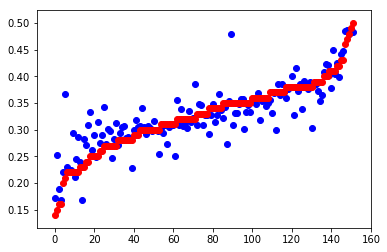

MSE                      = 0.00112460745764
MAE                      = 0.0225095573617
r2_score                 = 0.741834312675    (best_value is 1)
explained_variance_score = 0.74511794331    (best_value is 1)


In [100]:
predict_for_analize_fake = pd.DataFrame({'y_hold':y_values_keras, 'y_predict':y_predict[:,0]})
# print('Анализ реальных aps с реальными значениями wc')
print('Анализ реальных aps с аппроксимированными значениями wc \n на данных aps 2 (152 скважины)')
data_analize_func(predict_for_analize_fake)

In [95]:
# проверка модели на ансамбле деревьев
import pickle
# Loading the saved decision tree model pickle
decision_tree_pkl_filename = 'fake_data\\decision_forest_grid_fake_data_regressor.pkl'
decision_tree_model_pkl_load = open(decision_tree_pkl_filename, 'rb')
decision_tree_model = pickle.load(decision_tree_model_pkl_load)
print("Loaded Decision tree model :: ", decision_tree_model)

Loaded Decision tree model ::  GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=17,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 10, 20, 40, 60], 'n_estimators': [1, 10, 30, 50, 100, 200, 500], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)


Анализ реальных aps с аппроксимированными значениями wc 
 на данных aps 2 (152 скважины)


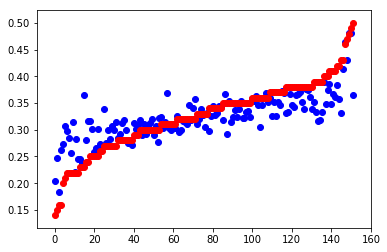

MSE                      = 0.00148138318421
MAE                      = 0.0276884210526
r2_score                 = 0.659932623295    (best_value is 1)
explained_variance_score = 0.660188130106    (best_value is 1)


In [99]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
y_pred = decision_tree_model.predict(x_values)
predict_for_analize_fake = pd.DataFrame({'y_hold':y_values, 'y_predict':y_pred})
# print('Анализ реальных aps с реальными значениями wc')
print('Анализ реальных aps с аппроксимированными значениями wc \n на данных aps 2 (152 скважины)')
data_analize_func(predict_for_analize_fake)

In [13]:
# сохраняем для анализа в матлабе
save_x_train = pd.DataFrame(x_train, columns=['x' + str(z) for z in range(0, count_val)])
save_y_train = pd.DataFrame(y_train, columns=['wc'])
save_xy_train = pd.merge(save_y_train, save_x_train, left_index = True, right_index = True)
save_x_hold = pd.DataFrame(x_hold, columns=['x' + str(z) for z in range(0, count_val)])
save_y_hold = pd.DataFrame(y_hold, columns=['wc'])
save_xy_hold = pd.merge(save_y_hold, save_x_hold, left_index = True, right_index = True)
save_xy_train.to_csv('matlab_prepare/data_fake_aps_train_spectrogram.csv', sep = ',', index = False, header = False)
save_xy_hold.to_csv('matlab_prepare/data_fake_aps_hold_spectrogram.csv', sep = ',', index = False, header =False)

In [14]:
col_names = ['wc']
x_names = ['x' + str(z) for z in range(0, 129)]
col_names.extend(x_names)
spectr_train = pd.read_csv("matlab_prepare/data_fake_aps_train_spectrogram_out.csv", delimiter=',', names=col_names)
spectr_hold = pd.read_csv("matlab_prepare/data_fake_aps_hold_spectrogram_out.csv", delimiter=',', names=col_names)
spectr_hold.head(n=2)

,wc,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128
0,0.36,0.29112,0.29130,0.29184,0.29283,0.29441,0.29694,0.30142,0.33911,0.41955,...,0.43950,0.47838,0.49012,0.62068,0.65032,0.86567,0.42641,0.37876,0.44196,0.69784
1,0.23,0.22665,0.22813,0.23280,0.24132,0.25506,0.27637,0.30924,0.35973,0.44425,...,0.53933,0.42038,0.45706,0.68891,0.57291,0.53057,0.45517,0.46877,0.73415,2.98740


In [15]:
y_train = spectr_train['wc'].values.tolist()
x_train = spectr_train[x_names].values.tolist() 
y_hold = spectr_hold['wc'].values.tolist()
x_hold = spectr_hold[x_names].values.tolist()

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

forest_reg =  RandomForestRegressor(n_estimators=10 ,
                           oob_score=True,
                           random_state=17)

from sklearn.model_selection import GridSearchCV, cross_val_score
forest_params = { 
    'max_depth': [1, 10, 20, 40, 60],
    'n_estimators': [1, 10, 30, 50, 70, 100],
    'max_features': ['auto', 'sqrt', 'log2']
}

print('Start', param, ' learning')
forest_grid = GridSearchCV(forest_reg, forest_params, cv=5, n_jobs=-1, verbose=True)
value_fit = forest_grid.fit(x_train, y_train) 
y_predict = forest_grid.predict(x_hold)

D:\libs\Anaconda\3.3\envs\aind\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Start APS  learning
Fitting 5 folds for each of 105 candidates, totalling 525 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 525 out of 525 | elapsed: 34.3min finished


In [17]:
data_well_for_analize = pd.DataFrame({'y_hold':y_hold, 'y_predict':y_predict})
data_well_for_analize.to_csv('fake_data/result_spectrogram.csv',index=False, sep = ';')

Обучение на классификаторе

In [10]:
y_values_r = [int(10 * y_val) for y_val in y_values]

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score

x_train, x_hold, y_train, y_hold = train_test_split(x_values, y_values, test_size=0.3, random_state=17)

D:\libs\Anaconda\3.3\envs\aind\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
# сохраняем для анализа
save_x_train = pd.DataFrame(x_train, columns=['x' + str(z) for z in range(0, count_val)])
save_y_train = pd.DataFrame(y_train, columns=['wc'])
save_xy_train = pd.merge(save_y_train, save_x_train, left_index = True, right_index = True)
save_x_hold = pd.DataFrame(x_hold, columns=['x' + str(z) for z in range(0, count_val)])
save_y_hold = pd.DataFrame(y_hold, columns=['wc'])
save_xy_hold = pd.merge(save_y_hold, save_x_hold, left_index = True, right_index = True)
save_xy_train.to_csv('fake_data/data_fake_aps_train.csv', sep = ';', index = False, header = True)
save_xy_hold.to_csv('fake_data/data_fake_aps_hold.csv', sep = ';', index = False, header =True)

In [12]:
# обучаем дерево
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

forest = RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=17)
# print(np.mean(cross_val_score(forest, x_hold, y_hold, cv=6))) # 0.949


forest_params = { 
    'max_depth': [1, 10, 20, 40, 60],
    'n_estimators': [1, 10, 30, 50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2']
}

forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)
 
forest_grid.fit(x_train, y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 525 out of 525 | elapsed: 22.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=17,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 10, 20, 40, 60], 'n_estimators': [1, 10, 30, 50, 100, 200, 500], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [13]:
print('forest_grid.best_params_ = ', forest_grid.best_params_)
print('forest_grid.best_score_ = ', forest_grid.best_score_)
print('forest_grid.best_estimator_ = ', forest_grid.best_estimator_)
#print('accuracy_score: ', accuracy_score(y_hold, forest_grid.predict(x_hold)))

forest_grid.best_params_ =  {'max_depth': 40, 'max_features': 'auto', 'n_estimators': 500}
forest_grid.best_score_ =  0.747710257386
forest_grid.best_estimator_ =  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=17,
           verbose=0, warm_start=False)


In [14]:
y_predict = forest_grid.predict(x_hold)

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

def data_analize_func(predict_for_analize, file_name = ''):
    # подготовка данных
    data_for_analize = predict_for_analize.sort_values(by=['y_hold'])
    data_for_analize['x_axis'] = [x for x in range(len(predict_for_analize['y_hold']))]
    data_for_analize.head()
    if file_name != '':
        data_for_analize.to_csv('AllGisParams/' + file_name, index=False, sep = ';')
    
    # построение графиков
    plt.scatter(data_for_analize['x_axis'], data_for_analize['y_predict'], color = 'blue')
    plt.scatter(data_for_analize['x_axis'], data_for_analize['y_hold'], color = 'red')
    plt.show()
    
    # regression metrics
    print('MSE                      = '+ str(mean_squared_error(data_for_analize['y_hold'], 
                                                                data_for_analize['y_predict'])))
    print('MAE                      = '+ str(mean_absolute_error(data_for_analize['y_hold'], 
                                                                 data_for_analize['y_predict'])))
    print('r2_score                 = '+ str(r2_score(data_for_analize['y_hold'], 
                                                      data_for_analize['y_predict'])) + '    (best_value is 1)')
    print('explained_variance_score = '+ str(explained_variance_score(data_for_analize['y_hold'], 
                                                                      data_for_analize['y_predict'])) + '    (best_value is 1)')

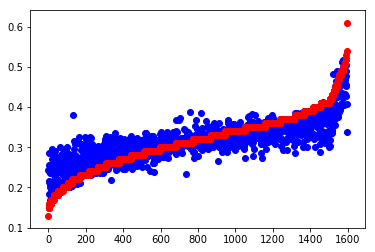

MSE                      = 0.00120860255254
MAE                      = 0.0246764308078
r2_score                 = 0.755595368026    (best_value is 1)
explained_variance_score = 0.755608697904    (best_value is 1)


In [17]:
predict_for_analize_fake = pd.DataFrame({'y_hold':y_hold, 'y_predict':y_predict})
data_analize_func(predict_for_analize_fake)

In [105]:
y_uniq = []
for y in  y_calc_val:
    is_uniq = True
    for y_un in y_uniq:
        if (y_un == y):
            is_uniq = False
    if (is_uniq):
        y_uniq.append(y)
y_uniq

[3, 4, 2, 1, 5]

In [21]:
import pickle
# Dump the trained decision tree classifier with Pickle
decision_tree_pkl_filename = 'fake_data\\decision_forest_grid_fake_data_regressor.pkl'
# Open the file to save as pkl file
decision_tree_model_pkl = open(decision_tree_pkl_filename, 'wb')
pickle.dump(forest_grid, decision_tree_model_pkl)
# Close the pickle instances
decision_tree_model_pkl.close()

In [19]:
import pickle
# Dump the trained decision tree classifier with Pickle
decision_tree_pkl_filename = 'fake_data\\decision_forest_grid_fake_data_regressor.pkl'
# Open the file to save as pkl file
decision_tree_model_pkl = open(decision_tree_pkl_filename, 'wb')
pickle.dump(forest_grid, decision_tree_model_pkl)
# Close the pickle instances
decision_tree_model_pkl.close()